In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

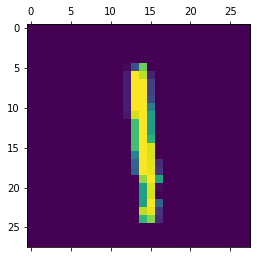

In [ ]:
(X_train, Y_train), (X_test, Y_test)= keras.datasets.mnist.load_data()
plt.matshow(X_train[8])

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(500, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(250, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4395 - accuracy: 0.8623
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1648 - accuracy: 0.9501
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1177 - accuracy: 0.9653
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0941 - accuracy: 0.9716
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0756 - accuracy: 0.9764
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0626 - accuracy: 0.9807
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0529 - accuracy: 0.9833
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0443 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0386 - accuracy: 0.9878
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1009 - accuracy: 0.9745


[0.10090371966362, 0.9745000004768372]

Text(159.0, 0.5, 'Truth')

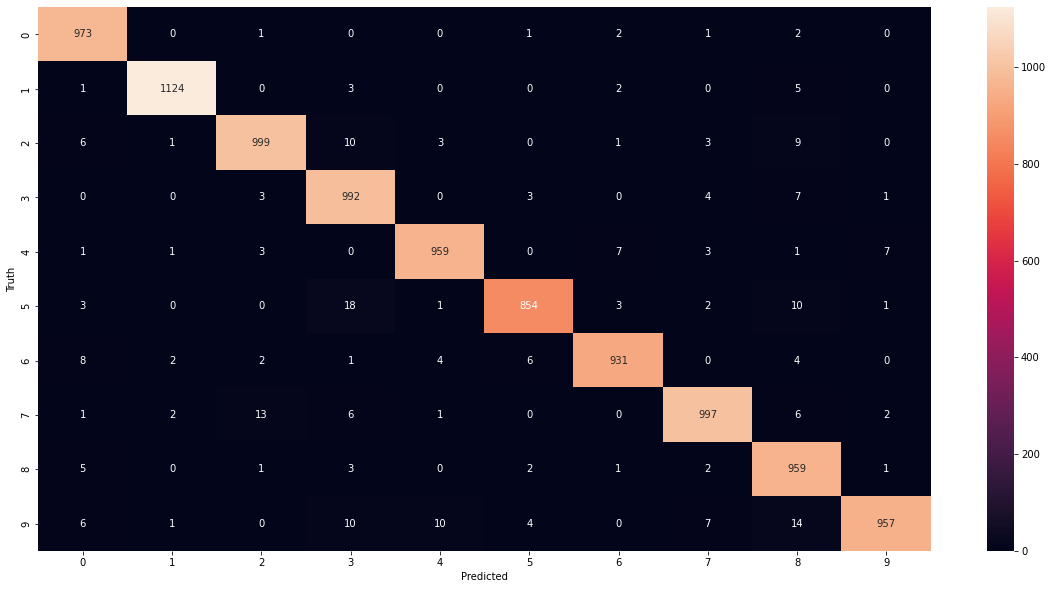

In [ ]:
import seaborn as sn
Y_predicted = model.predict(X_test)
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)

plt.figure(figsize = (20,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')